# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [28]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


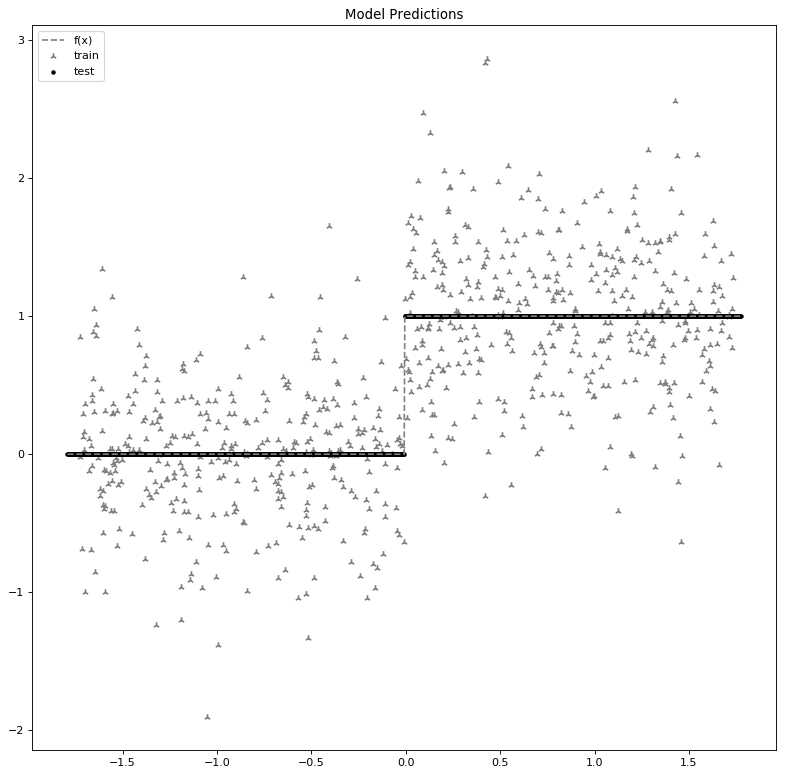

In [29]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "jumpdiscontinuity"
%run Data_Generator.ipynb

# Benchmark Models

Run univariate regression benchmarks file:

In [30]:
%run Univariate_Regression_Benchmark_Models.ipynb

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.7s finished


Epoch 1/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7200 - mse: 0.8150 - mae: 0.7200 - mape: 104.4819
Epoch 2/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6980 - mse: 0.7679 - mae: 0.6980 - mape: 114.1031
Epoch 3/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6760 - mse: 0.7195 - mae: 0.6760 - mape: 137.1156
Epoch 4/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6505 - mse: 0.6609 - mae: 0.6505 - mape: 185.9648
Epoch 5/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6168 - mse: 0.5896 - mae: 0.6168 - mape: 240.3471
Epoch 6/10
47/47 [==============================] - 0s 1ms/step - loss: 0.5772 - mse: 0.5141 - mae: 0.5772 - mape: 308.8761
Epoch 7/10
47/47 [==============================] - 0s 1ms/step - loss: 0.5363 - mse: 0.4463 - mae: 0.5363 - mape: 377.9653
Epoch 8/10
47/47 [==============================] - 0s 1ms/step - loss: 0.5039 - mse: 0.4035 - mae: 0.5039 - mape: 411.2837
Epoch 9/

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [24]:
# Second Round Re-Initializations (Global Level) #
#================================================#
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Boost input dimension if $d=1$, so that reconfigurations can be universal.

In [25]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x**2],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test**2],axis=1)
    d = d+1
    data_x_raw = data_x
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print(d)

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [6]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.6s finished


Epoch 1/10
47/47 [==============================] - 0s 5ms/step - loss: 0.7224 - mse: 0.7949 - mae: 0.7198 - mape: 134.0611
Epoch 2/10
47/47 [==============================] - 0s 5ms/step - loss: 0.6494 - mse: 0.6474 - mae: 0.6472 - mape: 147.7471
Epoch 3/10
47/47 [==============================] - 0s 5ms/step - loss: 0.5861 - mse: 0.5294 - mae: 0.5843 - mape: 165.3798
Epoch 4/10
47/47 [==============================] - 0s 5ms/step - loss: 0.5411 - mse: 0.4502 - mae: 0.5396 - mape: 215.6131
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5166 - mse: 0.4109 - mae: 0.5152 - mape: 224.2481
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5045 - mse: 0.3920 - mae: 0.5032 - mape: 234.6821
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4982 - mse: 0.3806 - mae: 0.4970 - mape: 270.5059
Epoch 8/10
47/47 [==============================] - 0s 5ms/step - loss: 0.4922 - mse: 0.3712 - mae: 0.4909 - mape: 258.3963
Epoch 9/

---
# Linear Model(s)
---

(1025,)

## NEU-OLS *(decoupled implementation)*

In [7]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_lin_reg = LinearRegression()
NEU_lin_reg.fit(data_x_featured_train,data_y)
# NEU_OLS_Internal = NEU_lin_reg.predict(data_x_featured_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.3s finished


Epoch 1/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6556 - mse: 0.6564 - mae: 0.6534 - mape: 176.6662
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6046 - mse: 0.5592 - mae: 0.6028 - mape: 184.2980
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5640 - mse: 0.4863 - mae: 0.5624 - mape: 223.0621
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5361 - mse: 0.4396 - mae: 0.5347 - mape: 264.9023
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5205 - mse: 0.4140 - mae: 0.5192 - mape: 279.1532
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5104 - mse: 0.3975 - mae: 0.5091 - mape: 291.5818
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5027 - mse: 0.3851 - mae: 0.5014 - mape: 308.0067
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4966 - mse: 0.3782 - mae: 0.4953 - mape: 293.6639
Epoch 9/

---
# Non-Linear Models
---

## Factor Model(s):

---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [9]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   15.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   15.3s finished


Epoch 1/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6783 - mse: 0.6990 - mae: 0.6760 - mape: 176.3759
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 0.6423 - mse: 0.6181 - mae: 0.6403 - mape: 296.1255
Epoch 3/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6279 - mse: 0.5832 - mae: 0.6262 - mape: 380.4912
Epoch 4/10
47/47 [==============================] - 0s 8ms/step - loss: 0.6255 - mse: 0.5705 - mae: 0.6238 - mape: 446.9776
Epoch 5/10
47/47 [==============================] - 0s 7ms/step - loss: 0.6237 - mse: 0.5674 - mae: 0.6220 - mape: 455.7194
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.6181 - mse: 0.5565 - mae: 0.6165 - mape: 483.9439
Epoch 7/10
47/47 [==============================] - 0s 6ms/step - loss: 0.5911 - mse: 0.5171 - mae: 0.5895 - mape: 439.3584
Epoch 8/10
47/47 [==============================] - 0s 6ms/step - loss: 0.5407 - mse: 0.4433 - mae: 0.5392 - mape: 346.4683
Epoch 9/

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [10]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   17.2s finished


Epoch 1/10
47/47 [==============================] - 0s 9ms/step - loss: 0.6079 - mse: 0.5886 - mae: 0.6059 - mape: 169.4143
Epoch 2/10
47/47 [==============================] - 0s 7ms/step - loss: 0.5230 - mse: 0.4244 - mae: 0.5216 - mape: 162.0565
Epoch 3/10
47/47 [==============================] - 0s 8ms/step - loss: 0.5047 - mse: 0.3953 - mae: 0.5034 - mape: 163.2489
Epoch 4/10
47/47 [==============================] - 0s 7ms/step - loss: 0.4962 - mse: 0.3788 - mae: 0.4950 - mape: 197.3054
Epoch 5/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4946 - mse: 0.3758 - mae: 0.4933 - mape: 218.4645
Epoch 6/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4921 - mse: 0.3696 - mae: 0.4909 - mape: 242.9775
Epoch 7/10
47/47 [==============================] - 0s 7ms/step - loss: 0.4892 - mse: 0.3659 - mae: 0.4880 - mape: 262.3571
Epoch 8/10
47/47 [==============================] - 0s 6ms/step - loss: 0.4884 - mse: 0.3654 - mae: 0.4871 - mape: 267.4131
Epoch 9/

#### Decoupled Implementation

In [11]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Completed Above
print("Phase 1 Complete: Feature Map Trained/Loaded")

# 2) Train ffNN #
#===============#
NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
                                                                   n_jobs = n_jobs, 
                                                                   n_iter = n_iter, 
                                                                   param_grid_in = param_grid_Vanilla_Nets,  
                                                                   X_train = data_x_NEU_train_feature_only, 
                                                                   y_train = data_y,
                                                                   X_test = data_x_NEU_test_feature_only)
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Update User #
#-------------#
print("Phase 2 Complete: Trained Vanilla Model")

# 3) Learn Structure Map #
#========================#
NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

# Update User #
#-------------#
print("Phase 3 Complete: Trained NEU-Structure Map")
print("NEU Statue: Trained")

Phase 1 Complete: Feature Map Trained/Loaded
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.4s finished


Epoch 1/10
47/47 [==============================] - 0s 968us/step - loss: 0.7348 - mse: 0.8314 - mae: 0.7348 - mape: 120.9864
Epoch 2/10
47/47 [==============================] - 0s 1ms/step - loss: 0.7122 - mse: 0.7811 - mae: 0.7122 - mape: 113.0005
Epoch 3/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6892 - mse: 0.7304 - mae: 0.6892 - mape: 149.8811
Epoch 4/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6672 - mse: 0.6771 - mae: 0.6672 - mape: 210.3971
Epoch 5/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6457 - mse: 0.6289 - mae: 0.6457 - mape: 274.0767
Epoch 6/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6274 - mse: 0.5872 - mae: 0.6274 - mape: 353.6329
Epoch 7/10
47/47 [==============================] - 0s 1ms/step - loss: 0.6124 - mse: 0.5573 - mae: 0.6124 - mape: 400.9174
Epoch 8/10
47/47 [==============================] - 0s 1ms/step - loss: 0.5964 - mse: 0.5286 - mae: 0.5964 - mape: 426.4960
Epoch 

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    9.4s finished


Epoch 1/10
47/47 [==============================] - 0s 4ms/step - loss: 0.6275 - mse: 0.6109 - mae: 0.6255 - mape: 127.4632
Epoch 2/10
47/47 [==============================] - 0s 4ms/step - loss: 0.5226 - mse: 0.4208 - mae: 0.5212 - mape: 186.2211
Epoch 3/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4957 - mse: 0.3782 - mae: 0.4945 - mape: 239.3578
Epoch 4/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4945 - mse: 0.3757 - mae: 0.4933 - mape: 252.0164
Epoch 5/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4948 - mse: 0.3751 - mae: 0.4936 - mape: 252.2167
Epoch 6/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4936 - mse: 0.3733 - mae: 0.4924 - mape: 258.6998
Epoch 7/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4930 - mse: 0.3714 - mae: 0.4918 - mape: 272.4107
Epoch 8/10
47/47 [==============================] - 0s 4ms/step - loss: 0.4904 - mse: 0.3706 - mae: 0.4891 - mape: 258.5529
Epoch 9/

---
---
---

---
# Result(s)
---

# Visualize Predictions

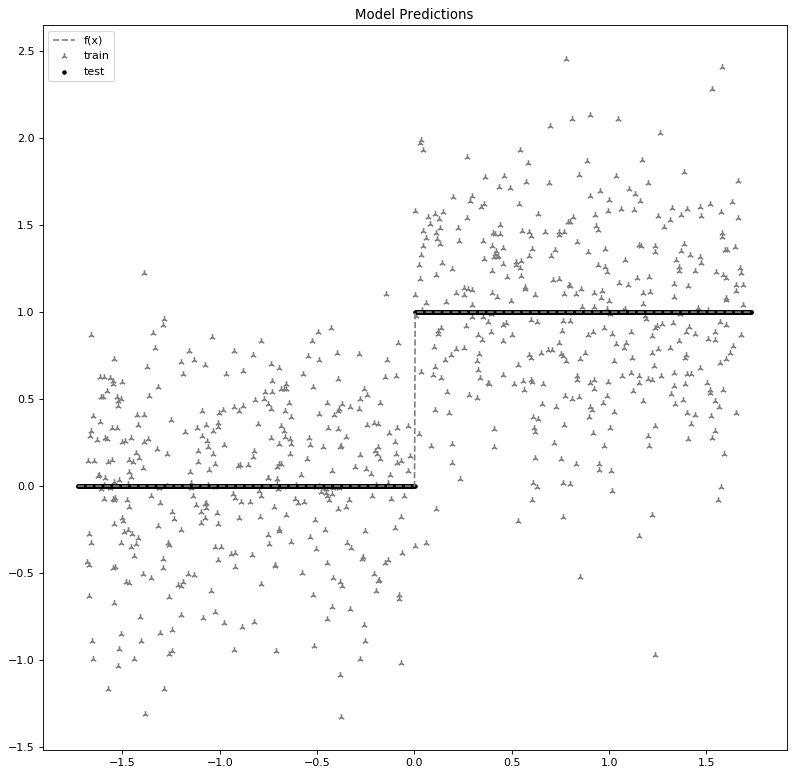

In [12]:
%run Data_Generator.ipynb

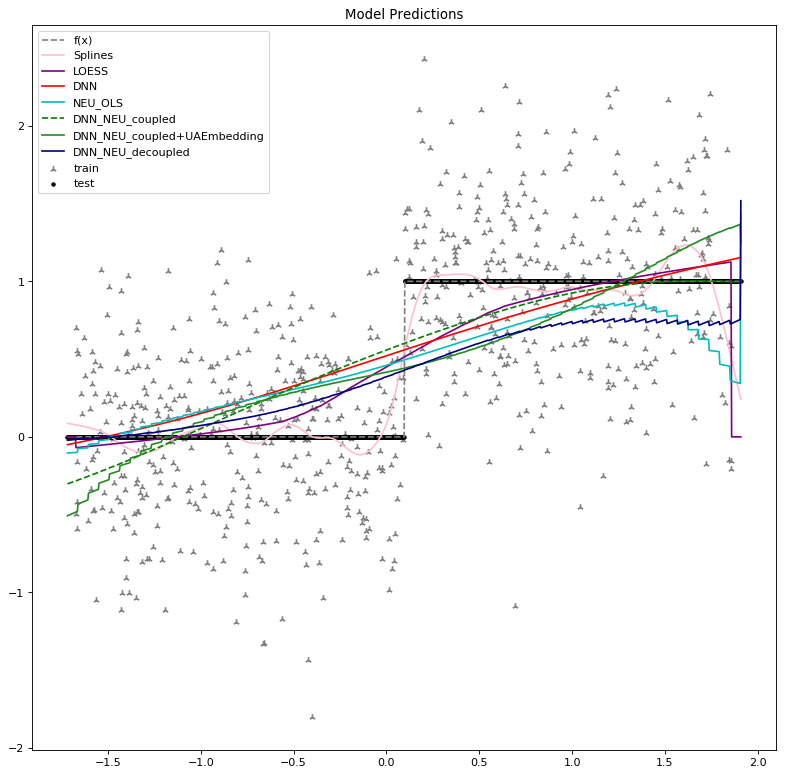

In [20]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')
# Plot Benchmark(s): DNNs
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')

#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# plt.plot(np.array(data_x_test).reshape(-1,),OLS_y_hat_test, color = 'orange',label='NEU_OLS')
# # Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, linestyle="--", color = 'green',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'forestgreen',label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

## Performance Report

In [14]:
#--------------------#
# Classical Model(s) #
#--------------------#
# NEU-OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
           train       test
MAE     0.464973   0.263578
MSE     0.335269   0.089960
MAPE  413.096373  74.917212


In [15]:
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
            train       test
MAE      0.425073   0.096298
MSE      0.280660   0.015717
MAPE  1482.884957  55.895571
LOESS Performance:
           train      test
MAE     0.434982  0.140130
MSE     0.291402  0.046713
MAPE  846.040834       NaN


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [16]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
print("NEU-ffNN (Decoupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
           train       test
MAE     0.470654   0.282966
MSE     0.342159   0.096657
MAPE  344.125869  76.444692
NEU-ffNN (Coupled) Performance:
           train       test
MAE     0.448754   0.189112
MSE     0.309072   0.062209
MAPE  294.800290  58.107860
NEU-ffNN (Coupled+UAEmbedding) Performance:
           train       test
MAE     0.471911   0.262901
MSE     0.341487   0.090346
MAPE  459.269283  70.855517
NEU-ffNN (Decoupled) Performance:
            train       test
MAE      0.458433   0.235498
MSE      0.328630   0.076159
MAPE  1083.184967  75.965394


#### The END

---